In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
# We use PIL lib to load image from a image path to be consistent with Tensorflow tutorial. You can use Skimage instead like previous weeks.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

batch_size = 32
img_height = 32
img_width = 32

unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)
num_classes = len(unique_labels)

batch_size = 32
img_height = 32
img_width = 32

data_augmentation = Sequential(
  [ 
    layers.RandomFlip("horizontal", 
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
);


from tensorflow.keras import layers, Model

def residual_block(x, filters, kernel_size, strides=(1, 1), activation='relu'):
    # Shortcut connection
    shortcut = x

    # Main path
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)

    x = layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Add shortcut connection
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='valid')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation(activation)(x)

    return x

# Define the model
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1./255)(inputs)
x = data_augmentation(x)

x = layers.Conv2D(60, (3, 3), strides=(1, 1), padding='valid', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

# Downsampling instead of average pooling
x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

# Add residual block
x = residual_block(x, filters=128, kernel_size=(3, 3))

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(num_classes)(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history_residual_model = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=10,
    verbose=2
)

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Epoch 1/10
1563/1563 - 265s - 169ms/step - accuracy: 0.0091 - loss: 4.6452 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/10
1563/1563 - 279s - 179ms/step - accuracy: 0.0087 - loss: 4.6059 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/10
1563/1563 - 255s - 163ms/step - accuracy: 0.0090 - loss: 4.6060 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/10
1563/1563 - 260s - 167ms/step - accuracy: 0.0090 - loss: 4.6059 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/10
1563/1563 - 266s - 170ms/step - accuracy: 0.0087 - loss: 4.6059 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/10
1563/1563 - 242s - 155ms/step - accuracy: 0.0087 - loss: 4.6059 - val_accuracy: 0.0

KeyboardInterrupt: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2367 - loss: 3.1786
Test Accuracy: 0.23520000278949738


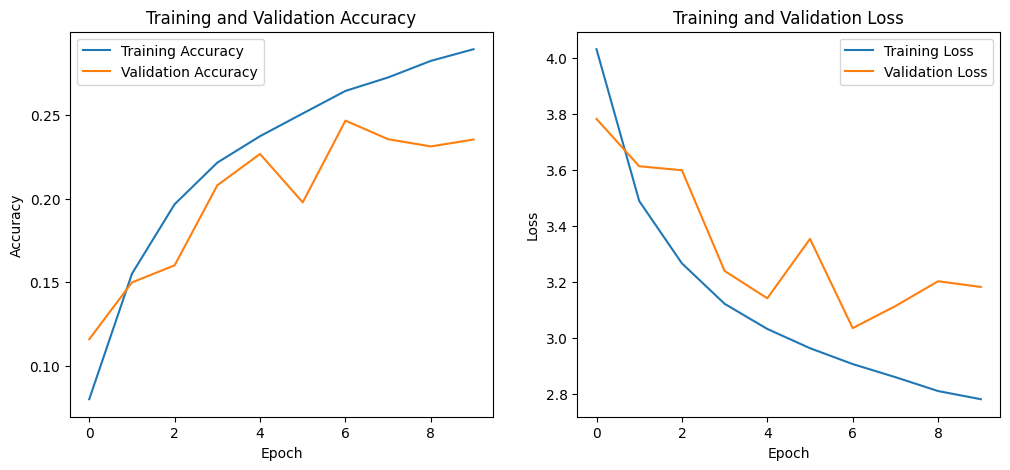

In [12]:

# Evaluate the model
test_loss, test_accuracy = base_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

#accuracy is 0.59

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bn_model_filter.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn_model_filter.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bn_model_filter.history['loss'], label='Training Loss')
plt.plot(history_bn_model_filter.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()